In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from deepface import DeepFace
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics.pairwise import cosine_similarity

In [3]:

# Set Paths
FACES_DIR = r"C:\Users\Dhanushkrishna\DAN_Final_year_project\2025\faces"  # Folder containing known face images
TEST_IMAGE_PATH = r"D:\Photos\FAV\photo.jpg"  # Path to the test image

# Load face embeddings from images
def load_face_database():
    database = []
    
    for filename in os.listdir(FACES_DIR):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(FACES_DIR, filename)
            try:
                face_embedding = DeepFace.represent(img_path, model_name="Facenet")[0]['embedding']
                database.append({"name": filename.split('.')[0], "embedding": face_embedding})
            except:
                print(f"Skipping {filename} (Face not detected)")
    
    return database

# Detect and match a face in a single photo
def detect_and_match_face(test_image_path, database, threshold=0.6):
    try:
        face_objs = DeepFace.represent(test_image_path, model_name="Facenet", enforce_detection=False)
    except:
        print("No face detected in the test image.")
        return None, None

    embedding = face_objs[0]['embedding']
    best_match = None
    best_similarity = -1
    similarity_scores = []

    for entry in database:
        similarity = cosine_similarity([embedding], [entry['embedding']])[0][0]
        similarity_scores.append(similarity)
        if similarity > best_similarity and similarity > threshold:
            best_match = entry
            best_similarity = similarity

    # Show the test image with predicted name
    test_img = cv2.imread(test_image_path)
    plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title(f"Predicted: {best_match['name']}" if best_match else "No Match Found")
    plt.show()

    return best_match['name'] if best_match else "Unknown", similarity_scores






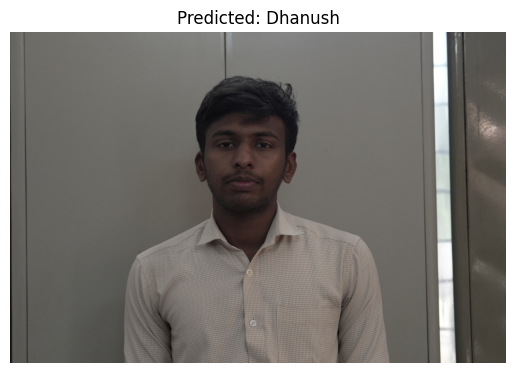

Predicted Name: Dhanush


In [4]:
# Load the database
database = load_face_database()

# Test a single photo
test_image_path = r"C:\Users\Dhanushkrishna\DAN_Final_year_project\2025\test_face\Dhanushkrishna (2).JPG"
predicted_name, similarity_scores = detect_and_match_face(test_image_path, database)

print(f"Predicted Name: {predicted_name}")


In [7]:
# Evaluate the model with multiple test images
def evaluate_model(test_images_folder, database, threshold=0.6):
    y_true = []
    y_pred = []
    all_similarities = []

    for filename in os.listdir(test_images_folder):
        if filename.endswith((".jpg", ".png", ".jpeg")):
            test_path = os.path.join(test_images_folder, filename)
            true_name = filename.split('.')[0]  # Assuming filename is the ground truth
            predicted_name, similarity_scores = detect_and_match_face(test_path, database, threshold)
            
            y_true.append(true_name)
            y_pred.append(predicted_name)
            all_similarities.extend(similarity_scores)    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=list(set(y_true)))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Cosine Similarity Distribution
    plt.figure(figsize=(8, 5))
    plt.hist(all_similarities, bins=20, color="skyblue", edgecolor="black")
    plt.axvline(threshold, color='red', linestyle='dashed', linewidth=2, label="Threshold")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Frequency")
    plt.title("Distribution of Cosine Similarity Scores")
    plt.legend()
    plt.show()

# Run the pipeline
database = load_face_database()
evaluate_model(r"C:\Users\Dhanushkrishna\DAN_Final_year_project\2025\test_face", database)  # Folder containing test images





Classification Report:


ValueError: max() arg is an empty sequence